In [51]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import boxcox
from statsmodels.tsa import stattools as st

In [52]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='BIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [53]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [54]:
df_dow = pd.read_csv("weekly-closings-of-the-dowjones-.csv", sep=',')

In [55]:
df_dow.head()

,Week,Close
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43


In [56]:
df_dow.columns

Index(['Week', 'Close'], dtype='object')

In [57]:
dow_series = df_dow['Close']

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecatio

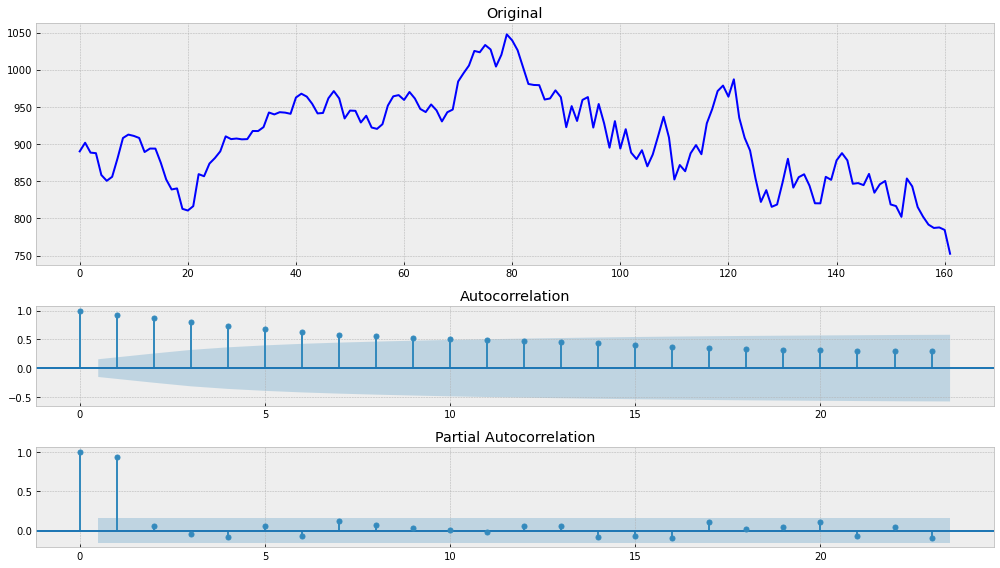

In [58]:
tsplot(dow_series)

Значение p-value (0.62) теста Дики-Фуллера не позволяет отвергнуть гипотезу о нестационарности ряда. Графики коррелограмм также не соответствуют стационарному ряду.

Выровняем размах дисперсии с помощью преобразования Бокса-Кокса

Results of Dickey-Fuller Test:
Test Statistic                  -1.263690
p-value                          0.645616
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecatio

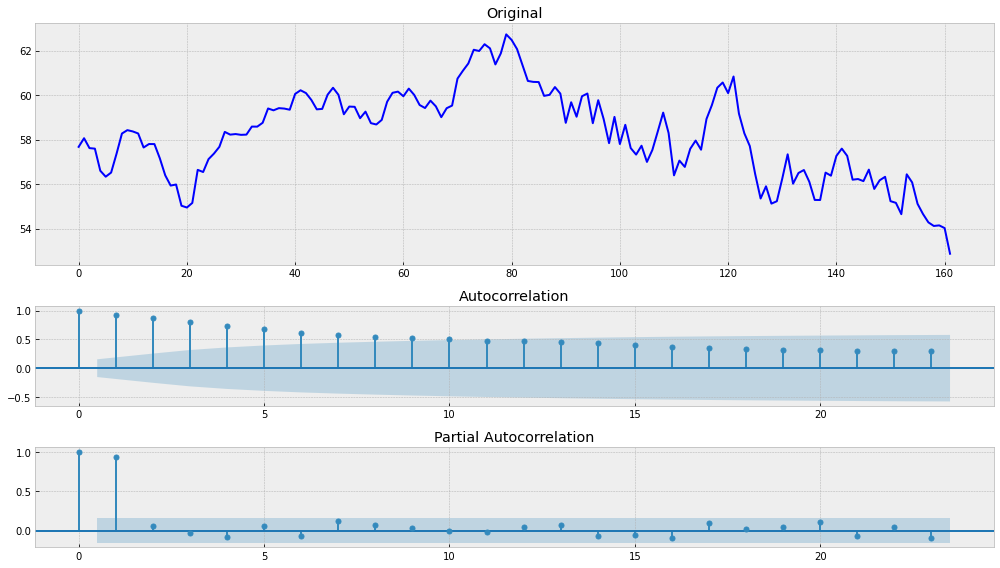

In [59]:
boxcox_dow_series = boxcox(dow_series, 0.5)
tsplot(boxcox_dow_series)

Улучшить результат не удалось, пробуем продифференцировать как исходный ряд, так и преобразованный с помощью метода Бокса-Кокса.

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecatio

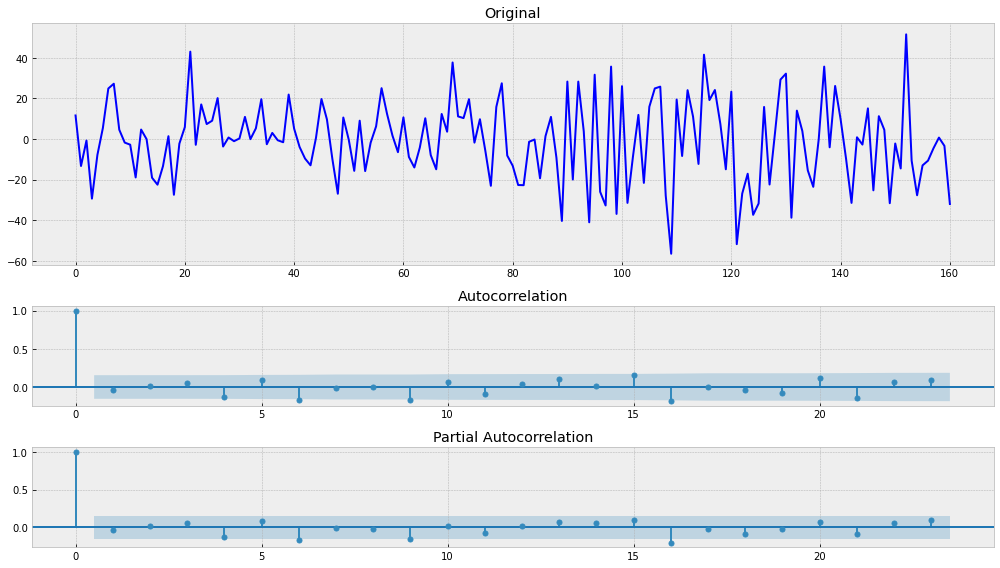

In [60]:
diff1_dow_series = np.diff(dow_series, 1)
tsplot(diff1_dow_series)

Results of Dickey-Fuller Test:
Test Statistic                -1.114320e+01
p-value                        3.071500e-20
#Lags Used                     3.000000e+00
Number of Observations Used    1.560000e+02
Critical Value (1%)           -3.472979e+00
Critical Value (5%)           -2.880252e+00
Critical Value (10%)          -2.576747e+00
dtype: float64


C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecatio

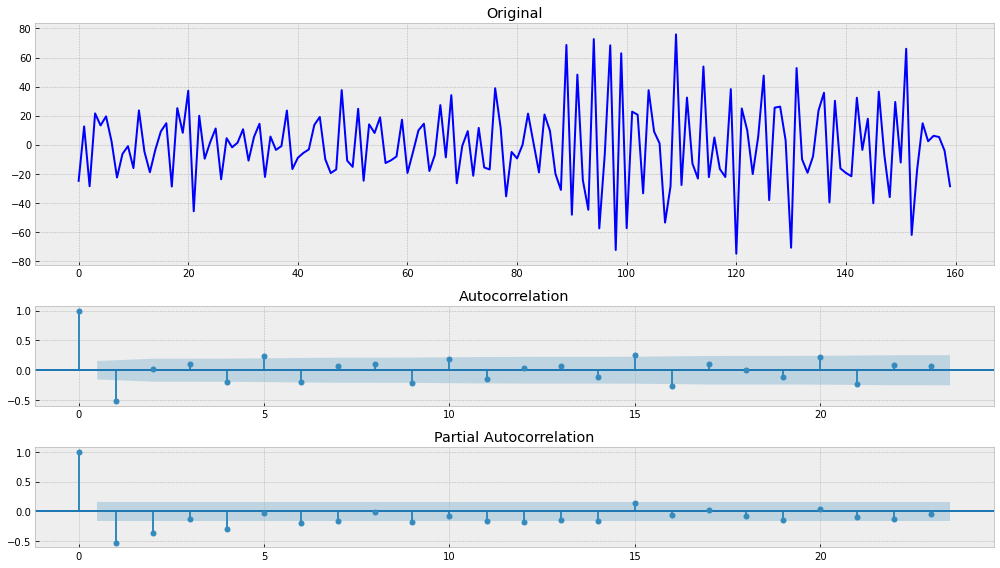

In [61]:
diff2_dow_series = np.diff(dow_series, 2)
tsplot(diff2_dow_series)

Results of Dickey-Fuller Test:
Test Statistic                -1.301319e+01
p-value                        2.542560e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecatio

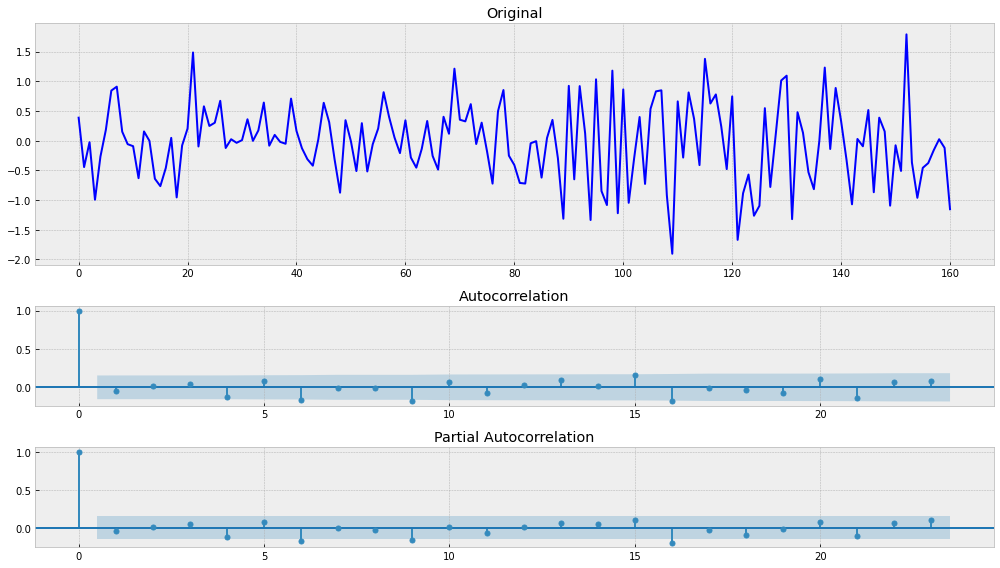

In [62]:
diff1_box_dow_series = np.diff(boxcox_dow_series, 1)
tsplot(diff1_box_dow_series)

Results of Dickey-Fuller Test:
Test Statistic                -1.111642e+01
p-value                        3.553764e-20
#Lags Used                     3.000000e+00
Number of Observations Used    1.560000e+02
Critical Value (1%)           -3.472979e+00
Critical Value (5%)           -2.880252e+00
Critical Value (10%)          -2.576747e+00
dtype: float64


C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecatio

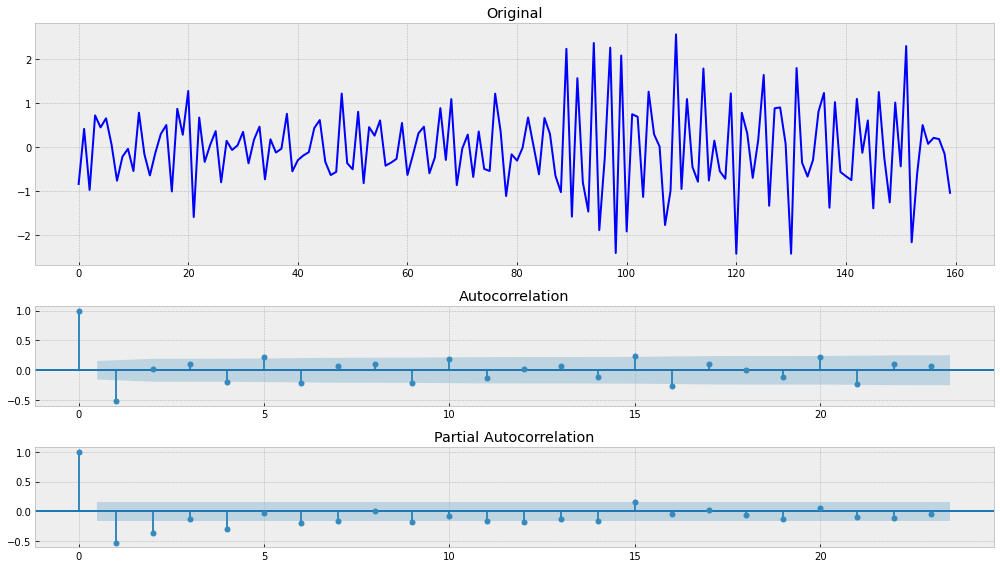

In [63]:
diff2_box_dow_series = np.diff(boxcox_dow_series, 2)
tsplot(diff2_box_dow_series)

Results of Dickey-Fuller Test:
Test Statistic                -1.114320e+01
p-value                        3.071500e-20
#Lags Used                     3.000000e+00
Number of Observations Used    1.560000e+02
Critical Value (1%)           -3.472979e+00
Critical Value (5%)           -2.880252e+00
Critical Value (10%)          -2.576747e+00
dtype: float64


C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecatio

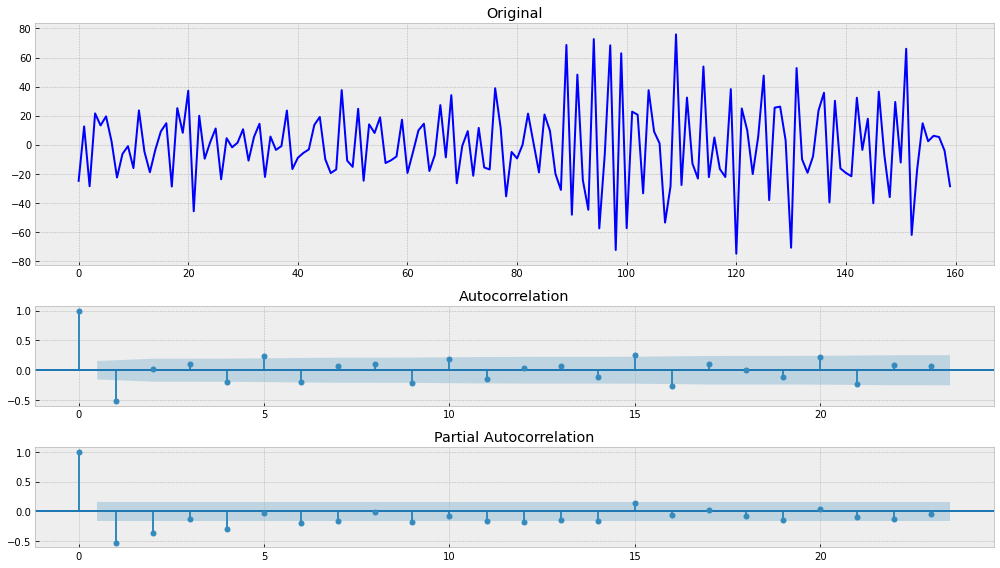

In [64]:
tsplot(diff2_dow_series)

После двойной дифференцации исходного ряда мы ДОЛНО БЫЛО ПОЛУЧИТЬСЯ  значения p-value ОКОЛО 0.0000XX 
НО ПОЧЕМУ ТО ЭТОГО НЕ ПРОИЗОШЛО


In [66]:
dow1 = dow_series[:80]

In [67]:
dow2 = dow_series[80:]

Results of Dickey-Fuller Test:
Test Statistic                 -0.223153
p-value                         0.935705
#Lags Used                      0.000000
Number of Observations Used    79.000000
Critical Value (1%)            -3.515977
Critical Value (5%)            -2.898886
Critical Value (10%)           -2.586694
dtype: float64


C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecatio

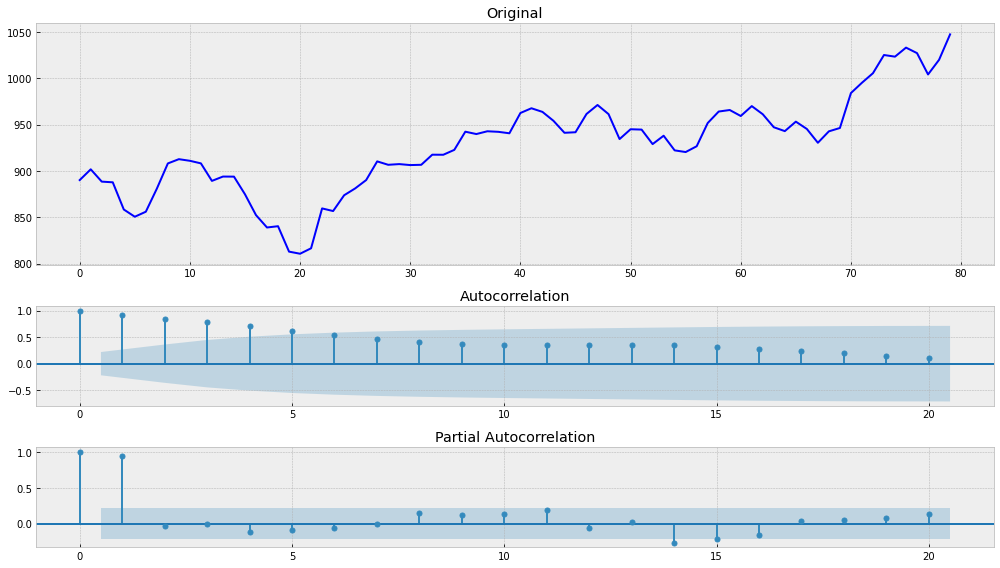

In [68]:
tsplot(dow1)

Results of Dickey-Fuller Test:
Test Statistic                 -0.290089
p-value                         0.926896
#Lags Used                      0.000000
Number of Observations Used    79.000000
Critical Value (1%)            -3.515977
Critical Value (5%)            -2.898886
Critical Value (10%)           -2.586694
dtype: float64


C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecatio

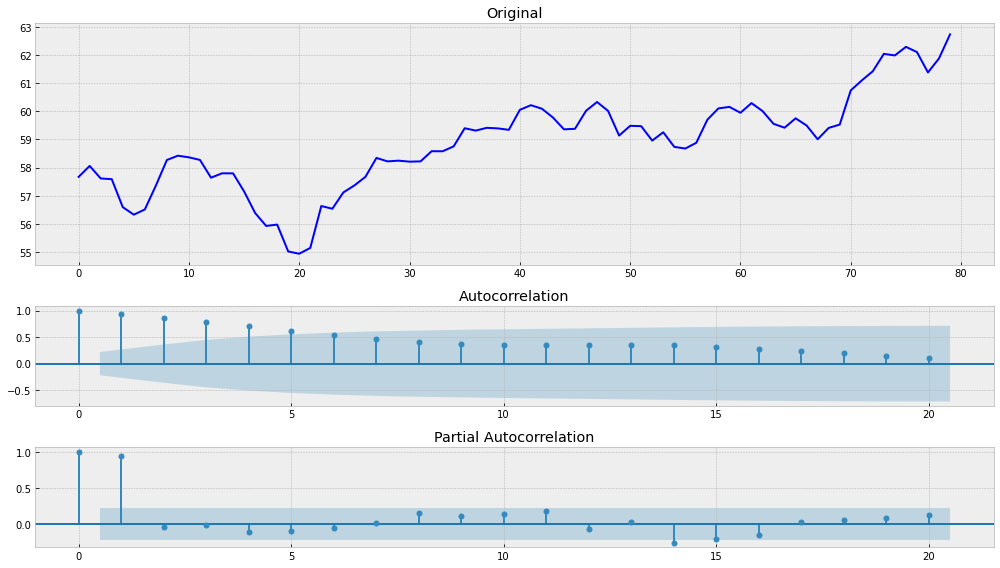

In [69]:
box_dow1 = boxcox(dow1, 0.5)
tsplot(box_dow1)

Results of Dickey-Fuller Test:
Test Statistic                -6.926592e+00
p-value                        1.111270e-09
#Lags Used                     0.000000e+00
Number of Observations Used    7.800000e+01
Critical Value (1%)           -3.517114e+00
Critical Value (5%)           -2.899375e+00
Critical Value (10%)          -2.586955e+00
dtype: float64


C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecatio

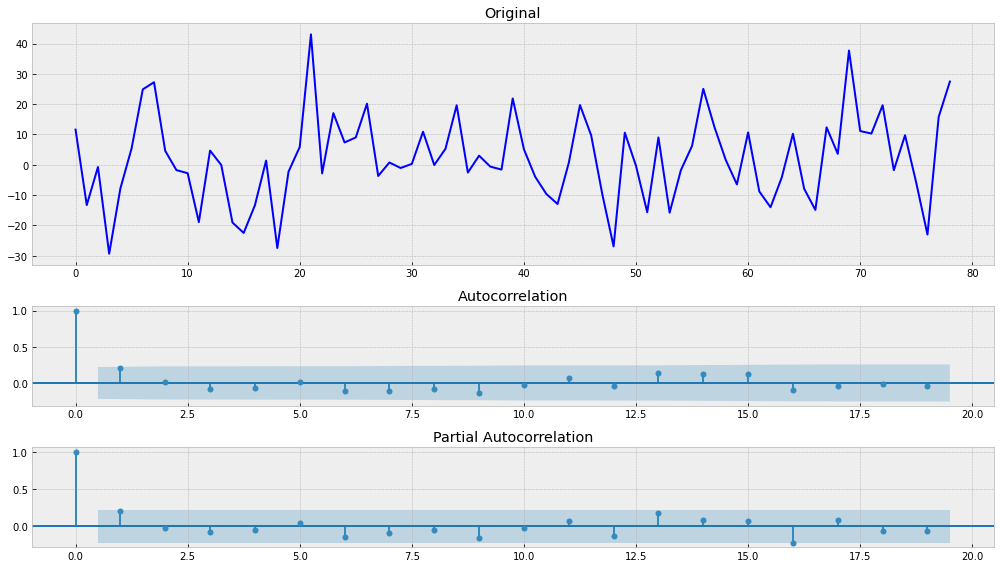

In [70]:
diff1_dow1 = np.diff(dow1, 1)
tsplot(diff1_dow1)

Results of Dickey-Fuller Test:
Test Statistic                 -1.954633
p-value                         0.306812
#Lags Used                      0.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
Critical Value (5%)            -2.897943
Critical Value (10%)           -2.586191
dtype: float64


C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecatio

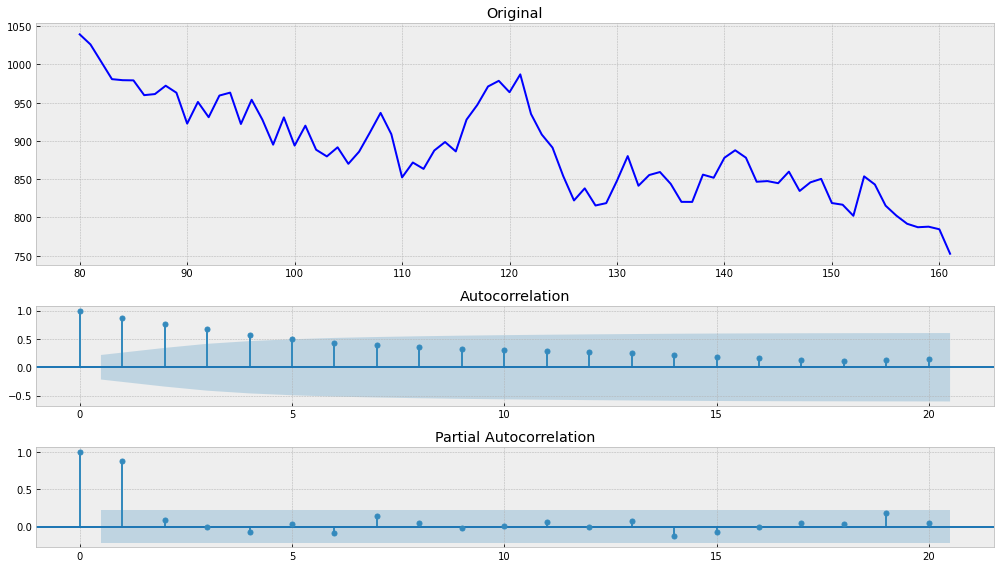

In [73]:
tsplot(dow2)

In [72]:
box_dow2 = boxcox(dow2)
tsplot(box_dow2)

Results of Dickey-Fuller Test:


ValueError: setting an array element with a sequence.

Видимо, что-то случилось, пропустим Бокс-Кокос преобразование, тем более, что ранее на данной последовательности особого эффекта оно не давало.

Пробуем продифференцировать последовательность.

Results of Dickey-Fuller Test:
Test Statistic                -1.019208e+01
p-value                        6.283790e-18
#Lags Used                     0.000000e+00
Number of Observations Used    8.000000e+01
Critical Value (1%)           -3.514869e+00
Critical Value (5%)           -2.898409e+00
Critical Value (10%)          -2.586439e+00
dtype: float64


C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecatio

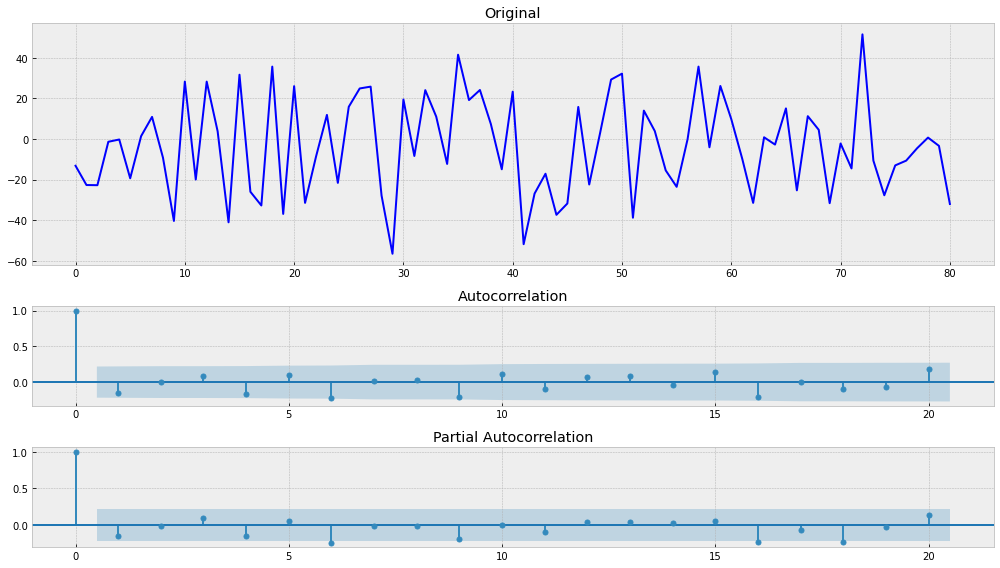

In [74]:
diff1_dow2 = np.diff(dow2, 1)
tsplot(diff1_dow2)

Results of Dickey-Fuller Test:
Test Statistic                -1.208308e+01
p-value                        2.209159e-22
#Lags Used                     1.000000e+00
Number of Observations Used    7.800000e+01
Critical Value (1%)           -3.517114e+00
Critical Value (5%)           -2.899375e+00
Critical Value (10%)          -2.586955e+00
dtype: float64


C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\FORPIT2\FFF\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecatio

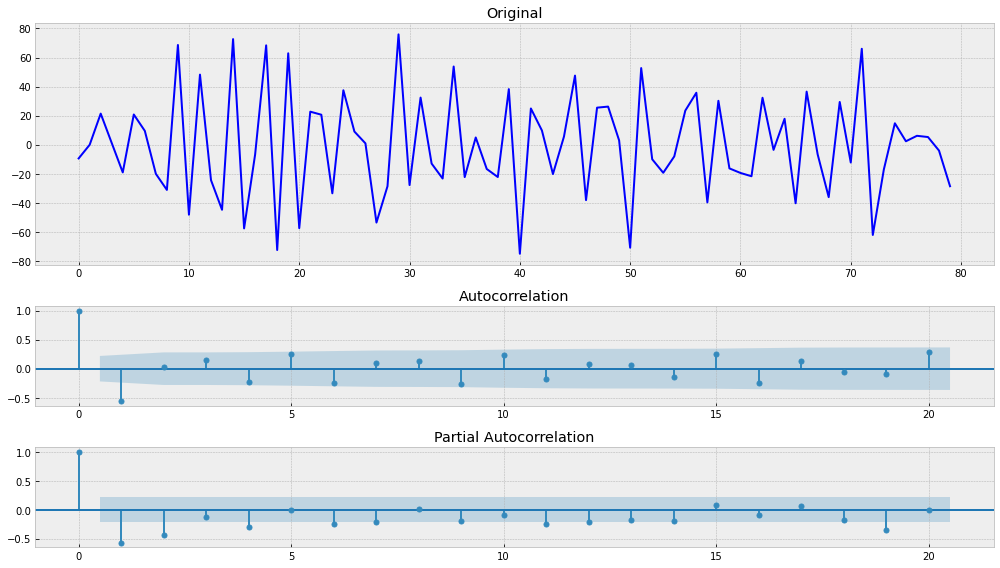

In [75]:
diff2_dow2 = np.diff(dow2, 2)
tsplot(diff2_dow2)